In [ ]:
import scipy.io
mat = scipy.io.loadmat('/content/surf_encoded_alldescp_gabor_metric.mat',matlab_compatible=True)

In [ ]:
a=mat['a']

In [ ]:
import pandas as pd

In [ ]:
dat=pd.read_excel('/content/Book 3.xlsx',header=None)

In [ ]:
for ind,i in dat.iterrows():
  i[0]=i[0][:-1]

In [ ]:
dat

,0
0,Abdomen
1,Abdomen
2,Abdomen
3,Abdomen
4,Abdomen
...,...
1681,Wrist
1682,Wrist
1683,Wrist
1684,Wrist


In [ ]:
dat.value_counts()

Chest                              723
Others                             120
Knee                               102
Abdomen                             80
Cervical Spine                      76
Feet                                70
Pelvis                              67
Wrist                               63
Lumbar Spine and Thoracic Spine     45
Hand and Wrist                      42
Ankle                               41
Shoulder                            40
Lumbar Spine                        39
Hand                                31
Elbow                               23
Sinus                               23
Lower Leg                           19
Hip                                 19
Finger                              15
Thoracic Spine                      15
Forearm                             12
Abdomen and Chest                   11
Skull                               10
dtype: int64

In [ ]:
df=pd.DataFrame(a)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.126239,0.000000,0.063119,0.000000,0.126239,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.078567,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.078567,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.046029,0.000000,0.092057,0.092057,0.000000,0.046029,0.000000,0.046029,0.000000,0.0,...,0.000000,0.092057,0.046029,0.000000,0.046029,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.090443,0.000000,0.000000,0.045222,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.045222,0.000000,0.045222,0.000000,0.000000,0.000000,0.135665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,0.000000,0.000000,0.000000,0.000000,0.032513,0.032513,0.032513,0.032513,0.032513,0.0,...,0.000000,0.000000,0.000000,0.000000,0.065026,0.065026,0.000000,0.000000,0.000000,0.065026
1682,0.000000,0.000000,0.073373,0.073373,0.000000,0.000000,0.000000,0.036686,0.036686,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036686,0.000000,0.000000
1683,0.000000,0.000000,0.107348,0.000000,0.000000,0.000000,0.000000,0.000000,0.035783,0.0,...,0.000000,0.107348,0.000000,0.035783,0.000000,0.000000,0.035783,0.000000,0.000000,0.035783
1684,0.000000,0.000000,0.000000,0.000000,0.000000,0.161281,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.053760,0.000000,0.000000,0.000000,0.000000


In [ ]:
classes=set(dat[0])

In [ ]:
import numpy as np

In [ ]:
classes=np.array(list(classes))

In [ ]:
classes

array(['Thoracic Spine', 'Hand', 'Finger', 'Knee', 'Elbow',
       'Lumbar Spine', 'Forearm', 'Cervical Spine', 'Skull', 'Others',
       'Lower Leg', 'Sinus', 'Ankle', 'Hand and Wrist', 'Pelvis', 'Chest',
       'Feet', 'Abdomen', 'Lumbar Spine and Thoracic Spine', 'Wrist',
       'Hip', 'Abdomen and Chest', 'Shoulder'], dtype='<U31')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn import preprocessing
>>> le = preprocessing.LabelEncoder()

In [ ]:
le.fit(classes)

LabelEncoder()

In [ ]:
label=le.transform(dat[0])

In [ ]:
len(label)

1686

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df,label, test_size=0.25,stratify=label)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
learn = XGBClassifier()
learn.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

In [ ]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', make_pipeline(KNeighborsClassifier(23)))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=XGBClassifier())
clf.fit(X_train,y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('svr',
                                Pipeline(steps=[('kneighborsclassifier',
                                                 KNeighborsClassifier(n_neighbors=23))]))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 early_stopping_rounds=None...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None,
                                                 random_state=None, ...))

In [ ]:
pred1 = clf.predict(X_test)

In [ ]:
clf.score (X_test, y_test)

0.6445497630331753

In [ ]:
c1=sklearn.metrics.confusion_matrix(y_test,pred1)
print(c1)

[[  8   0   0   2   4   0   0   0   0   0   0   0   1   0   1   0   1   1
    0   2   0   0   0]
 [  1   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   2   0   0   0   0   0   0   0   0   0   5   2   0   0   1   0
    0   0   0   0   0]
 [  1   0   0  10   1   0   0   0   0   0   0   1   0   0   1   0   3   2
    0   0   0   0   0]
 [  2   0   1   2 166   0   0   0   0   0   0   1   1   0   0   1   2   2
    0   1   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   5   0   0   0   0   0
    0   0   1   0   0]
 [  0   0   7   0   0   1   6   0   0   0   0   0   2   0   0   0   0   0
    0   0   0   0   1]
 [  0   0   0   0   0   0   1   1   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   2]
 [  0   0   0   0   0   0   0   0   0   0   1   0   1   0   0   0   0   0
    0   0   0   0   1]
 [  0   0   0   0   0   0   0   0   0   2   3   0   0   0   1   0   0   0
    0   0   0   0   2]
 [  0   0   0   0   0   0   1 

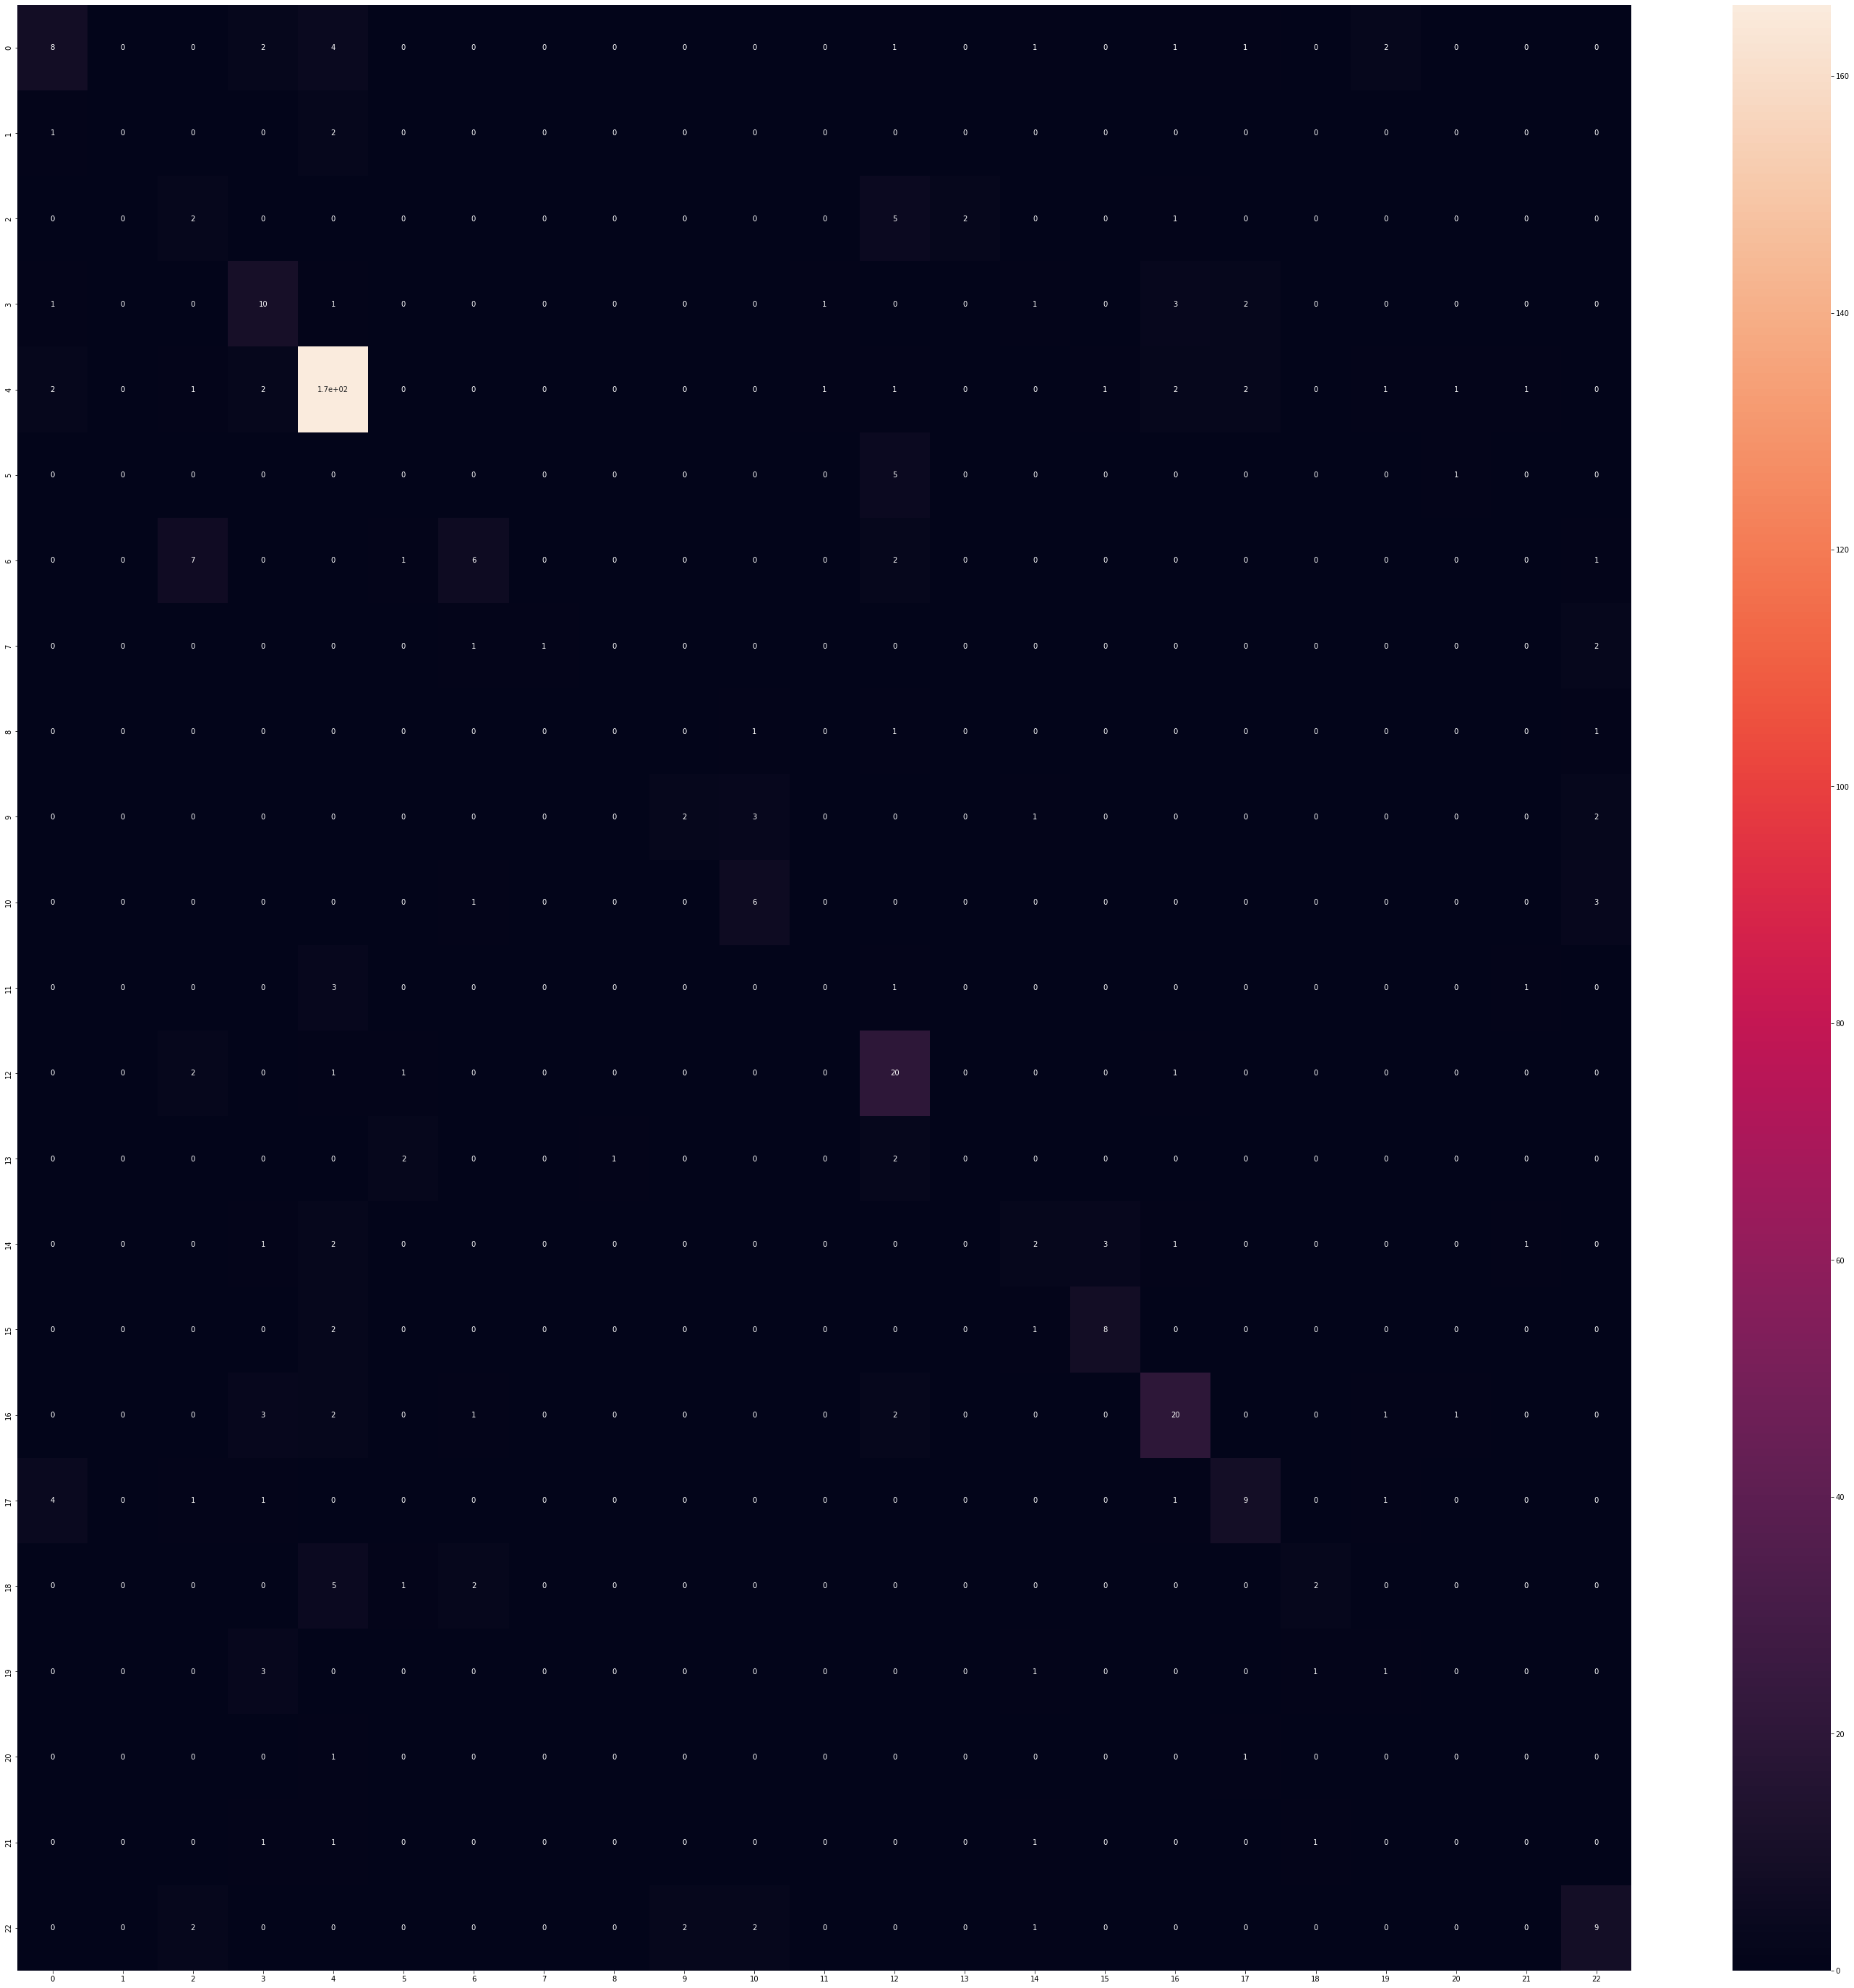

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(c1, range(23), range(23))
plt.figure(figsize=(50,50))

sn.heatmap(df_cm, annot=True) # font size

plt.show()

In [ ]:
pred = learn.predict(X_test)
sci_pred = [round(value) for value in pred]

In [ ]:
learn.score (X_test, y_test)

0.6706161137440758

In [ ]:
pred

array([ 4,  4,  4,  4,  0, 17,  4, 16,  4, 14, 16, 22, 18,  4,  4,  4,  4,
        3,  4,  4,  4,  4,  4,  4,  9, 17,  4,  4, 17, 10, 16,  4,  4,  3,
        4, 12, 17, 16,  4,  4,  4,  6,  0,  4,  4,  4, 22,  4,  4,  4,  4,
       22,  4, 12,  4,  4, 16,  4,  4,  4, 22, 12,  4,  4,  4,  2,  8, 18,
       10, 16,  6,  3, 12,  4,  0,  6,  4,  6,  4,  4,  4, 12,  4,  7, 16,
       17, 17,  2, 22,  4,  9,  4, 12,  4, 18,  4,  0,  4,  4,  4, 16, 15,
        4,  4,  4,  4, 17,  4,  4,  3,  4,  5,  3,  0, 17, 16,  4,  4, 15,
       16,  4,  4,  4, 10,  3,  6,  4,  4,  0, 16,  4,  4, 12, 22,  4,  6,
        4,  4,  4,  4, 12,  3,  4,  4,  4,  3,  4, 12,  2,  4,  4, 12,  4,
        4,  4, 22,  4,  9, 15,  4, 15,  4,  4, 12,  4,  4, 10, 12, 10,  4,
       16,  2,  4,  4,  4, 12,  3,  4,  4,  4,  4,  4,  0,  4,  6,  6,  4,
       17,  4,  4,  4, 22,  4,  4, 12,  4,  4, 10,  4,  4,  4,  4,  3,  3,
       10,  4, 17,  4, 18,  6,  3,  4,  4,  4,  4,  4,  4,  4,  3, 15, 12,
        4,  4,  4,  4,  4

In [ ]:
import sklearn

In [ ]:
cm=sklearn.metrics.confusion_matrix(y_test,pred)
print(cm)

[[  7   0   0   1   8   0   0   0   0   0   0   0   0   0   0   1   1   2
    0   0   0   0   0]
 [  0   0   0   1   2   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   6   0   0   0   1   0   0   0   0   0   2   0   0   0   1   0
    0   0   0   0   0]
 [  2   0   0  11   3   0   1   0   0   0   0   0   0   0   0   0   2   0
    0   0   0   0   0]
 [  0   0   0   1 175   0   0   0   0   0   0   0   2   0   0   0   2   0
    1   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0   0   0   3   0   0   0   0   0
    1   0   0   0   1]
 [  0   0   1   0   1   0   9   0   0   0   2   0   0   0   0   0   1   0
    1   0   0   0   2]
 [  0   0   0   0   1   0   0   0   0   1   0   0   0   0   0   0   0   0
    0   0   0   0   2]
 [  0   0   2   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   1   6   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0 

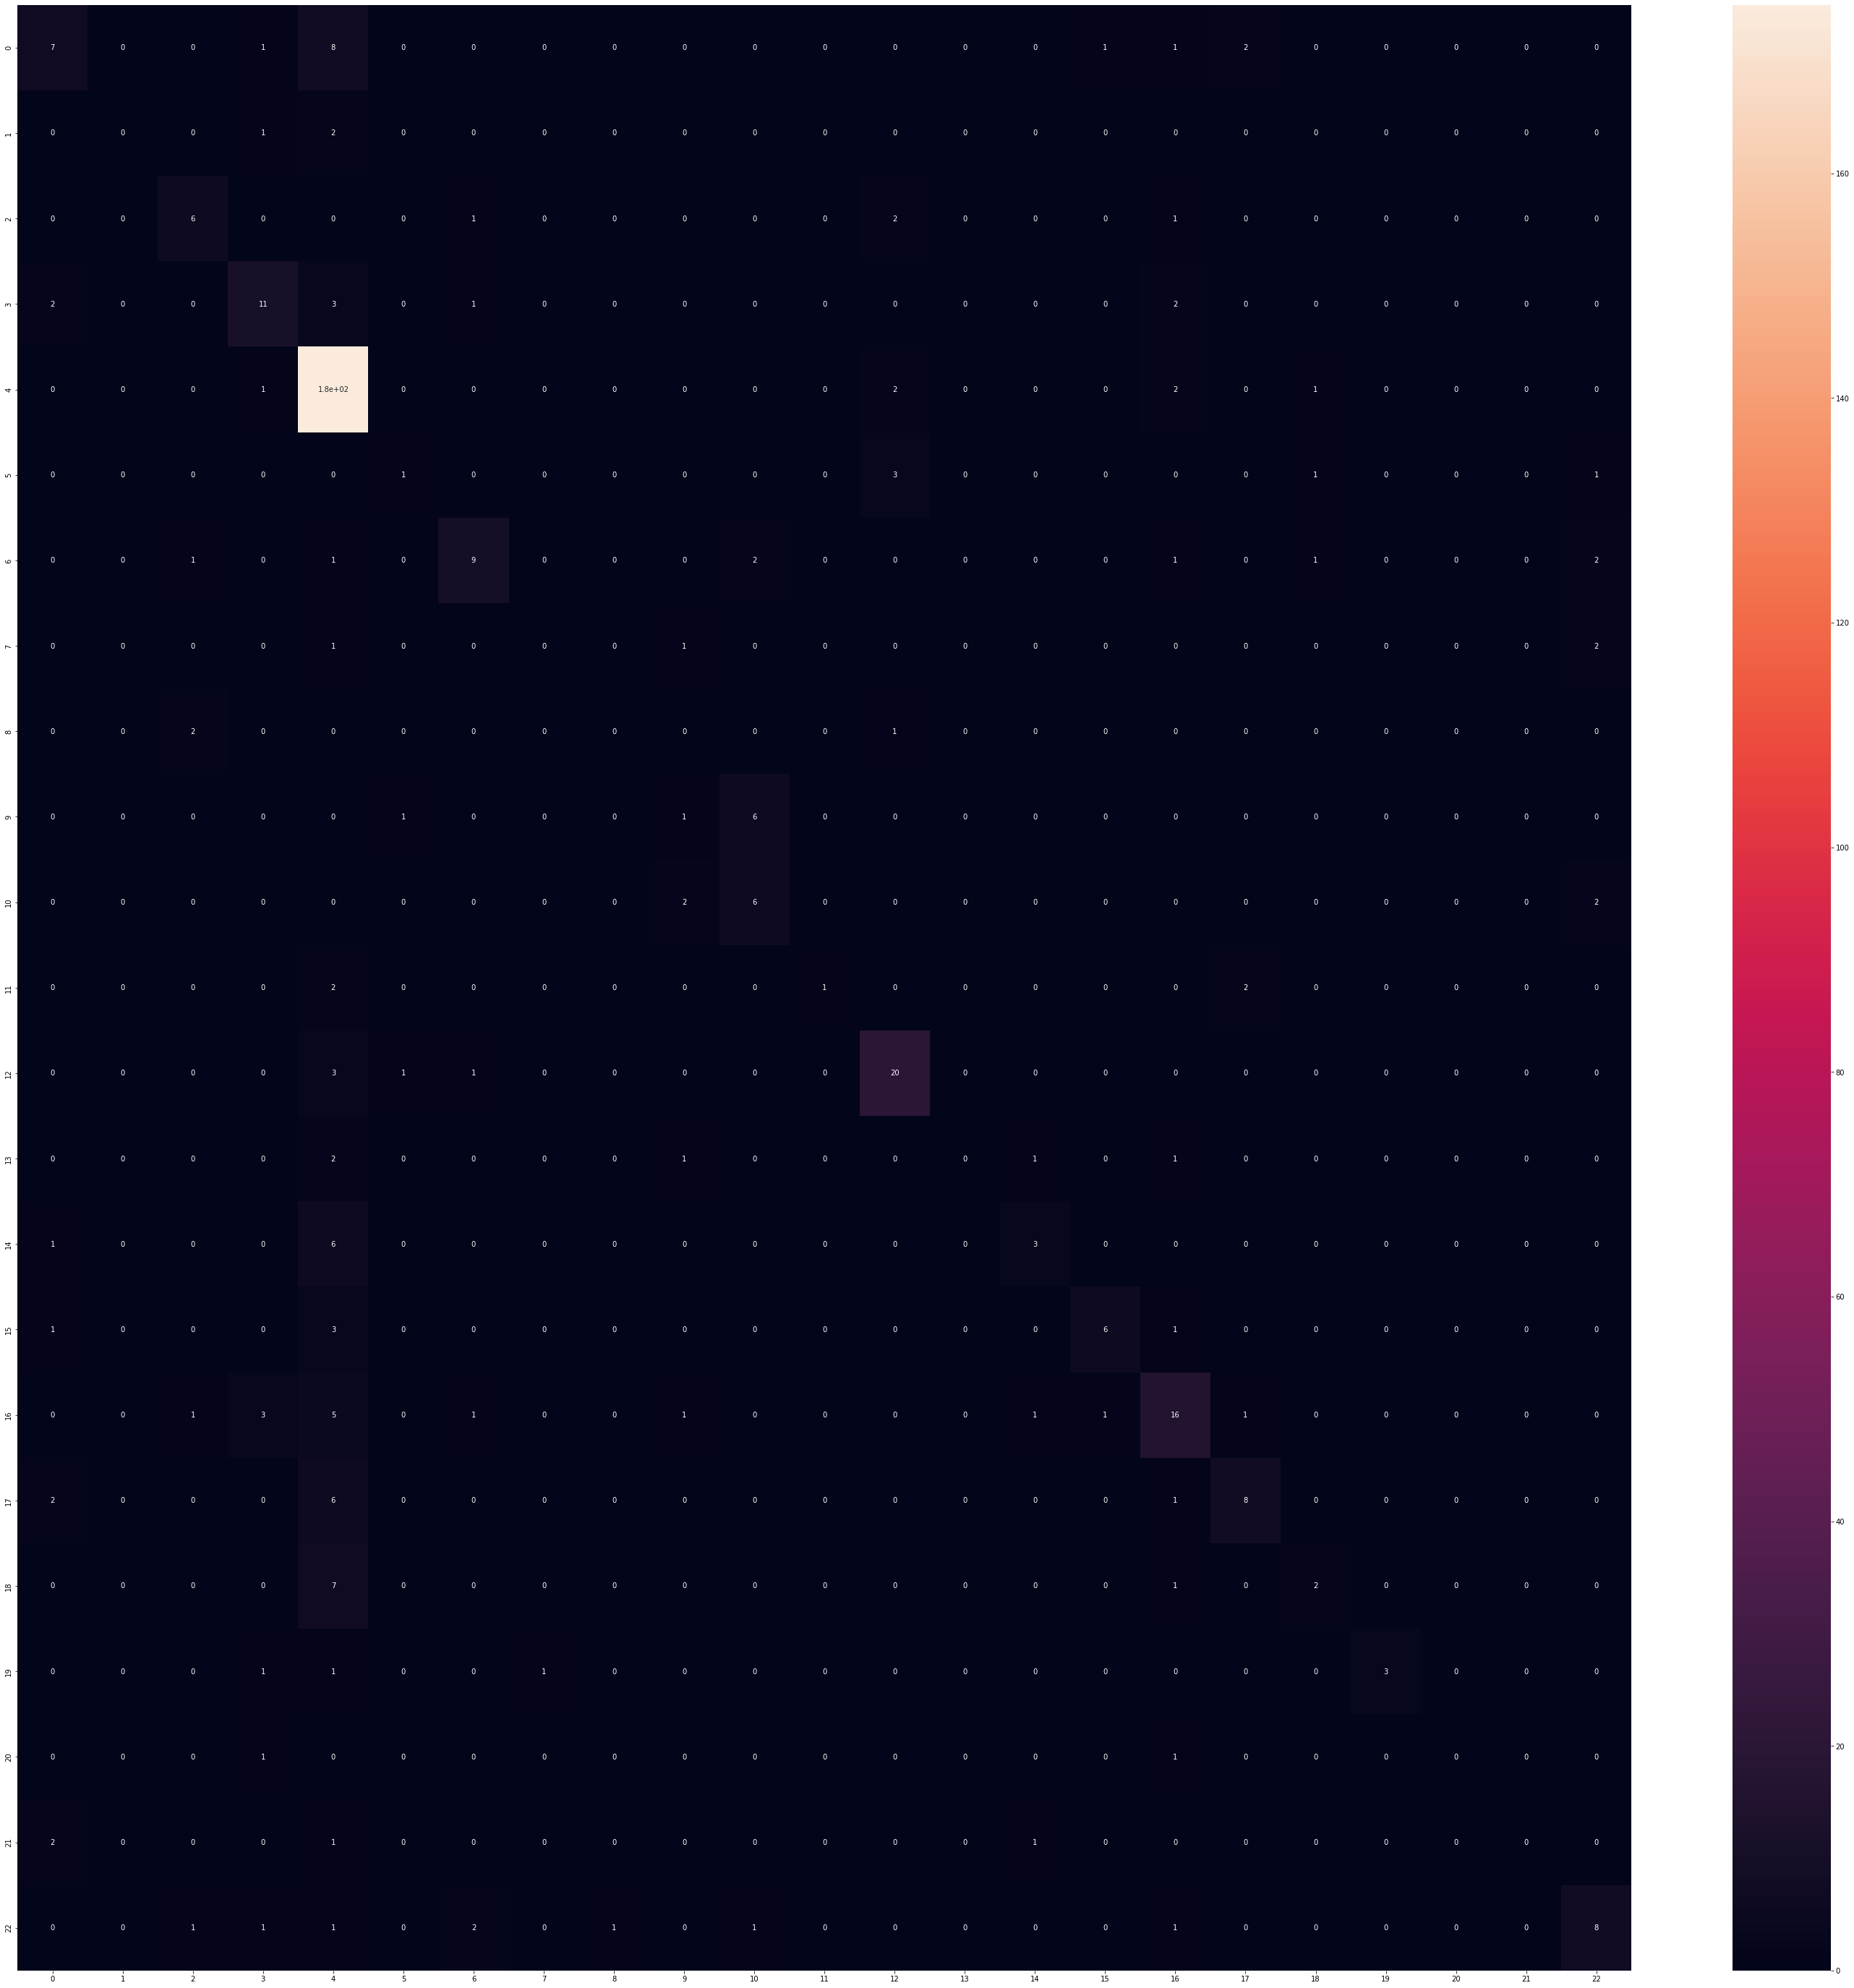

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


df_cm = pd.DataFrame(cm, range(23), range(23))
plt.figure(figsize=(50,50))

sn.heatmap(df_cm, annot=True) # font size

plt.show()

In [ ]:
le.transform(classes)

array([ 0,  6,  2,  9, 21,  7, 10, 17, 13, 15,  8,  4, 18, 12, 20, 11, 16,
       19,  3,  1,  5, 22, 14])

In [ ]:
classes

array(['Abdomen', 'Feet', 'Ankle', 'Hand', 'Thoracic Spine', 'Finger',
       'Hand and Wrist', 'Pelvis', 'Lower Leg',
       'Lumbar Spine and Thoracic Spine', 'Forearm', 'Chest', 'Shoulder',
       'Knee', 'Skull', 'Hip', 'Others', 'Sinus', 'Cervical Spine',
       'Abdomen and Chest', 'Elbow', 'Wrist', 'Lumbar Spine'],
      dtype='<U31')

In [ ]:
print(sklearn.metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.47      0.35      0.40        20
           1       0.00      0.00      0.00         3
           2       0.55      0.60      0.57        10
           3       0.55      0.58      0.56        19
           4       0.77      0.97      0.86       181
           5       0.33      0.17      0.22         6
           6       0.60      0.53      0.56        17
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         3
           9       0.17      0.12      0.14         8
          10       0.40      0.60      0.48        10
          11       1.00      0.20      0.33         5
          12       0.71      0.80      0.75        25
          13       0.00      0.00      0.00         5
          14       0.50      0.30      0.37        10
          15       0.75      0.55      0.63        11
          16       0.55      0.53      0.54        30
          17       0.62    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
